In [1]:
!pip install pyupbit

You should consider upgrading via the 'c:\users\mango\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-ETC", interval="minute60", count=400, period=0.2)
df

,open,high,low,close,volume,value
2021-05-10 02:00:00,9080.0,9080.0,9015.0,9025.0,5.712101e+03,5.166323e+07
2021-05-10 03:00:00,9025.0,9075.0,9000.0,9025.0,6.672590e+03,6.019896e+07
2021-05-10 04:00:00,9020.0,9090.0,8985.0,9005.0,7.917212e+03,7.143884e+07
2021-05-10 05:00:00,9005.0,9100.0,8990.0,9070.0,3.698522e+03,3.353656e+07
2021-05-10 06:00:00,9050.0,9110.0,9045.0,9105.0,7.630771e+03,6.929728e+07
...,...,...,...,...,...,...
2021-05-26 13:00:00,10780.0,10820.0,10470.0,10470.0,1.026981e+06,1.092682e+10
2021-05-26 14:00:00,10470.0,10600.0,10330.0,10370.0,1.017282e+06,1.063038e+10
2021-05-26 15:00:00,10390.0,10530.0,10050.0,10490.0,1.765994e+06,1.809282e+10
2021-05-26 16:00:00,10500.0,10670.0,10300.0,10410.0,1.699028e+06,1.780050e+10


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-05-10 02:00:00,9025.0
1,2021-05-10 03:00:00,9025.0
2,2021-05-10 04:00:00,9005.0
3,2021-05-10 05:00:00,9070.0
4,2021-05-10 06:00:00,9105.0
...,...,...
395,2021-05-26 13:00:00,10470.0
396,2021-05-26 14:00:00,10370.0
397,2021-05-26 15:00:00,10490.0
398,2021-05-26 16:00:00,10410.0


In [5]:
#prophet 불러옴
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [44]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [45]:
#48시간 미래 예측
future = model.make_future_dataframe(periods=48, freq='H')
forecast = model.predict(future)

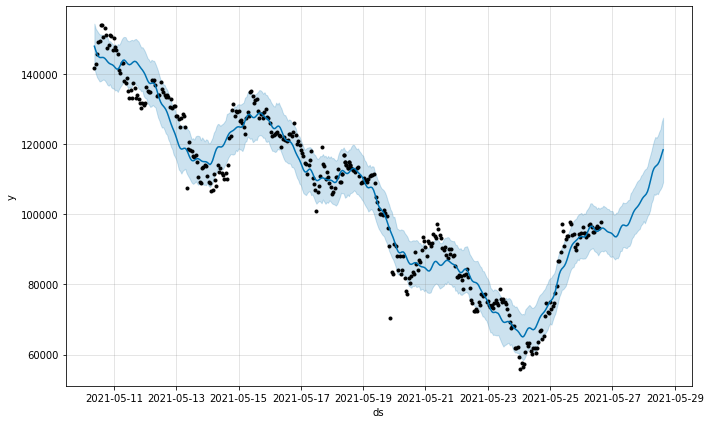

In [46]:
#그래프1
fig1 = model.plot(forecast)

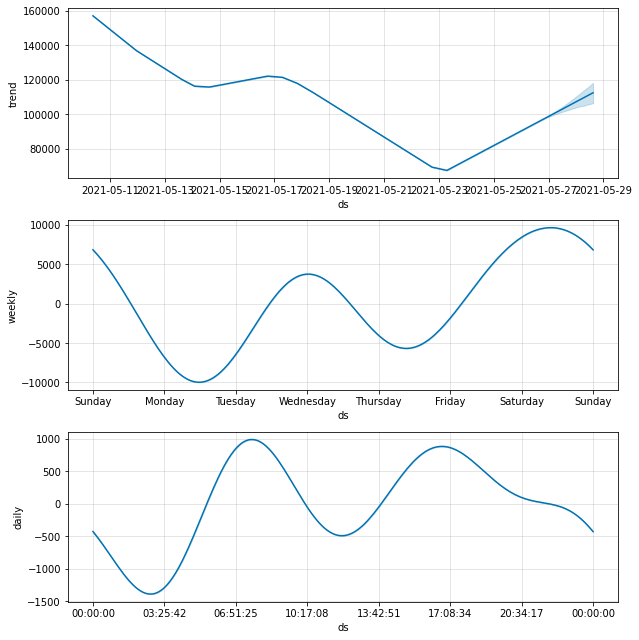

In [47]:
#그래프2
fig2 = model.plot_components(forecast)

In [48]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-ETC")
nowValue

97910.0

In [49]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨌든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

113613.62485787079

In [50]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  97910.0
종가의 가격:  113613.62485787079


In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-05-10 09:00:00,157101.369349,141659.993728,154370.961758,157101.369349,157101.369349,-9175.535613,-9175.535613,-9175.535613,617.086870,617.086870,617.086870,-9792.622483,-9792.622483,-9792.622483,0.0,0.0,0.0,147925.833736
1,2021-05-10 10:00:00,156570.741250,140218.429326,152931.717922,156570.741250,156570.741250,-9808.541303,-9808.541303,-9808.541303,92.272869,92.272869,92.272869,-9900.814172,-9900.814172,-9900.814172,0.0,0.0,0.0,146762.199947
2,2021-05-10 11:00:00,156040.113151,139118.110488,152358.538360,156040.113151,156040.113151,-10299.205156,-10299.205156,-10299.205156,-340.305571,-340.305571,-340.305571,-9958.899584,-9958.899584,-9958.899584,0.0,0.0,0.0,145740.907996
3,2021-05-10 12:00:00,155509.485053,138508.501352,151770.364948,155509.485053,155509.485053,-10456.412665,-10456.412665,-10456.412665,-489.992050,-489.992050,-489.992050,-9966.420615,-9966.420615,-9966.420615,0.0,0.0,0.0,145053.072388
4,2021-05-10 13:00:00,154978.856954,137884.290285,151312.906497,154978.856954,154978.856954,-10240.706770,-10240.706770,-10240.706770,-317.435368,-317.435368,-317.435368,-9923.271402,-9923.271402,-9923.271402,0.0,0.0,0.0,144738.150184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2021-05-28 11:00:00,111106.350984,105745.263242,122441.633888,105866.865528,116035.893938,3225.345346,3225.345346,3225.345346,-340.305571,-340.305571,-340.305571,3565.650917,3565.650917,3565.650917,0.0,0.0,0.0,114331.696330
435,2021-05-28 12:00:00,111457.668069,106618.890583,123502.964078,105985.719182,116619.664488,3548.218013,3548.218013,3548.218013,-489.992050,-489.992050,-489.992050,4038.210064,4038.210064,4038.210064,0.0,0.0,0.0,115005.886082
436,2021-05-28 13:00:00,111808.985153,107172.596968,124289.148854,106129.293783,117150.230979,4181.813666,4181.813666,4181.813666,-317.435368,-317.435368,-317.435368,4499.249034,4499.249034,4499.249034,0.0,0.0,0.0,115990.798819
437,2021-05-28 14:00:00,112160.302237,107885.833120,126354.066529,106347.353297,117694.680046,5023.503887,5023.503887,5023.503887,76.292245,76.292245,76.292245,4947.211642,4947.211642,4947.211642,0.0,0.0,0.0,117183.806124
